
# PS2: Mini-batch SGD, CNN, and RNN

Advanced Learning 2024/5.


Last updated: 2024-12-26


For SUBMISSION:   

Please upload the complete and executed `ipynb` to your git repository. Verify that all of your output can be viewed directly from github, and provide a link to that git file below.

~~~
STUDENT ID: 208088815
~~~

~~~
STUDENT GIT LINK: MISSING
~~~
In Addition, don't forget to add your ID to the files, and upload to moodle the html version:    
  
`PS2_CNN_RNN_2024_ID_[208088815].html`   




---


Imports:

In [1]:
import numpy as np # You are allowed to use  only numpy.
import time, sys, cProfile
import matplotlib.pyplot as plt

Please import the objects in `src.py` file into the workspace

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
your_drive_path_to_src_file = "/content/drive/MyDrive/"
sys.path.append(your_drive_path_to_src_file)


In [4]:
from  src import *

Note that now all of the network's objects from PS1 are loaded into the workspace.

---

### 0. Loading data

As in PS1, you will evaluate your home-made network on the `mnist` dataset.   
The MNIST dataset is a large dataset of handwritten digits that is commonly used for training various image and vision models.  



In [5]:
from keras.datasets import mnist
from keras.utils import to_categorical
# load MNIST from server
# Using a standard library (keras.datasets) to load the mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

---

## PS2 Part 1: Mini-batch SGD



**Welcome back**.   






Mini-batch Stochastic Gradient Descent (Mini-batch SGD) is an optimization algorithm used to train machine learning models, particularly neural networks. It strikes a balance between two other methods:

    Batch Gradient Descent – Uses the entire dataset to compute gradients and update the model parameters.
        ✅ Accurate gradients
        ❌ Slow and memory-intensive for large datasets

    Stochastic Gradient Descent (SGD) – Uses a single data point to compute gradients for each update.
        ✅ Fast and efficient
        ❌ Noisy updates, which can lead to instability

  
**Mini-batch SGD**.

Mini-batch SGD computes gradients and updates the model parameters using small, randomly selected batches of data (typically 32, 64, or 128 samples).

    ✅ Faster than batch gradient descent
    ✅ Less noisy than pure SGD
    ✅ Efficient use of memory
    ✅ Enables vectorization for faster computation on GPUs

**How it Works**.

    Shuffle the dataset to avoid bias.

    Divide the data into small batches (e.g., 64 samples per batch).

    For each epoch, iterate through the mini-batches:
        Perform forward pass to calculate predictions.
        Compute the loss for the mini-batch.
        Perform backpropagation to compute gradients.
        Update model parameters using the gradients.

    Repeat until the model converges.

**Algorithm**

For each mini-batch $B={x_1,x_2,...,x_m}B={x_1​,x_2​,...,x_m​}$ of size $m$, update the weights $w$ as:    

$$
w=w−η⋅\frac{1}{m}∑_{i=1}^m ∇L(w,x_i)
$$

Where:   
*  $η$ = learning rate.
* $∇L(w,x_i)$ = gradient of the loss for sample $x_i$.   

Advantages

    Efficient and scalable – Works well with large datasets.
    Smooth convergence – Less noisy than SGD but faster than full batch training.
    Parallelization – Batches can be processed in parallel on GPUs.

Disadvantages

    Choosing batch size can affect performance. Small batches lead to noise, large batches consume more memory.
    Convergence may be slower than batch gradient descent for some problems.


### Mini-batch Questions.
**P1Q1**:  

Please answer the following questions providing statistical justifications and mathematical formulas when needed.

P1Q1a: Explain how the mini-batch size impacts convergence, model performance, and computational efficiency.



The mini-batch size plays a crucial role in convergence, model performance, and computational efficiency.

Smaller batch sizes introduce higher variance in the gradient estimates, which can cause noisier updates. While this noise can help the optimizer escape local minima, potentially leading to a better global minimum, it also makes the path to convergence more erratic. As a result, convergence tends to be slower with smaller batches, since the optimizer must navigate through more volatile gradients.
Larger batch sizes provide more stable gradient estimates, which can lead to faster convergence since the updates are more consistent.

From a performance perspective, smaller batch sizes generally achieve better generalization due to their regularization effects, while very large batches might achieve lower training loss but poorer generalization.
Smaller batch sizes, often lead to better generalization because they introduce more noise into the gradient updates. This noise helps the optimizer escape local minima and find better solutions.

In terms of computational efficiency, smaller batches require more frequent updates with fewer computations per update, but the total training time can increase due to the larger number of updates needed.
In contrast, larger batch sizes allow for better parallelism and more efficient use of computational resources, as more samples are processed at once, but they also require more memory, which can limit the model's size or the dataset that can be processed.

**P1Q1b:**   
Why does mini-batch SGD require a learning rate schedule, and what are the common scheduling strategies?



Mini-batch SGD requires a learning rate schedule because it must balance exploration and convergence throughout the training process. Early in training, larger steps are necessary to explore the parameter space and escape poor local minima. As training progresses, smaller steps are needed to fine-tune the parameters and converge to an optimal solution. A fixed learning rate cannot effectively handle both these phases.

Additionally, mini-batch sampling introduces noise into the gradient estimates. While this noise is beneficial early on for avoiding local minima, it can hinder precise convergence in later stages.

Common learning rate scheduling strategies include step decay, exponential decay, and linear decay. Step decay involves reducing the learning rate by a fixed factor at specific epochs, while exponential decay follows the formula: lr = lr₀ * e^(-kt) ,k is a decay rate. Linear decay gradually decreases the learning rate from an initial value to a final value over the course of training. These methods typically require manual tuning of hyperparameters to achieve optimal performance.

Adaptive optimization techniques further refine the learning rate dynamically.
Momentum accelerates gradient descent by incorporating a fraction of the previous update into the current one, which helps overcome local minima and speeds up convergence.

RMSprop maintains an exponentially decaying average of squared gradients, preventing overly aggressive reductions in the learning rate and allowing continued learning even after many updates.

Adam combines the benefits of RMSprop with momentum, using both the first moment (mean) and second moment (uncentered variance) of gradients to adapt the learning rate for each parameter. This adaptive approach helps balance convergence speed and stability across different phases of training.

P1Q1c: What role does batch normalization play in mini-batch SGD, and why is it essential for deep neural networks?



Without batch normalization, the distribution of each layer's inputs changes as the parameters of previous layers are updated. This shifting distribution forces subsequent layers to constantly adapt, slowing down training. Batch normalization stabilizes these distributions, allowing for faster convergence. Additionally, deep networks often suffer from vanishing or exploding gradients, and batch normalization helps maintain gradients within a reasonable range. It also enables the use of higher learning rates without the risk of divergence. As a result, networks become less sensitive to parameter initialization, and training can progress more quickly due to more aggressive optimization steps.

P1Q1d: How does mini-batch SGD differ in performance compared to full-batch gradient descent when dealing with non-convex optimization problems?



Mini-batch SGD often outperforms full-batch gradient descent in non-convex optimization problems due to the stochastic perturbations introduced by mini-batch sampling. These perturbations help the optimizer escape poor local minima and saddle points, which are common in non-convex landscapes. In contrast, full-batch gradient descent relies on the exact gradient at each step, making it more prone to getting trapped in suboptimal solutions or converging slowly near saddle points. The noise in mini-batch SGD also provides an implicit regularization effect, often resulting in solutions with better generalization to unseen data. Additionally, the higher frequency of updates in mini-batch SGD typically leads to faster convergence in practical scenarios.

P1Q1e: How does mini-batch SGD perform when training on imbalanced datasets, and what strategies can mitigate its challenges?



Mini-batch SGD faces significant challenges when training on imbalanced datasets because random batch sampling often mirrors the original data distribution, which can lead to mini-batches being dominated by the majority class. This imbalance may cause the model to develop a strong bias toward the majority class, resulting in poor performance on minority classes. The problem worsens when the imbalance is severe, as some mini-batches might lack any examples from the minority classes, causing gradient updates to ignore these underrepresented but crucial cases.

To mitigate these challenges, several strategies can be employed. One approach is class-balanced sampling, where the composition of mini-batches is modified by oversampling the minority classes or undersampling the majority classes to ensure a more balanced representation of all classes. Another effective method is modifying the loss function, such as using class-weighted loss functions that assign higher weights to minority class examples, making them more influential during gradient computation. Advanced techniques like data augmentation, particularly for minority classes, can also increase their representation in the dataset without direct duplication. Additionally, synthetic data generation methods such as SMOTE (Synthetic Minority Over-sampling Technique) can be used to create new, synthetic examples for the minority classes, helping to balance the dataset.

P1Q1f: Explain why larger mini-batch sizes are preferred during inference but not necessarily during training.


Larger mini-batch sizes are preferred during inference because they maximize computational efficiency. During inference, there is no need to store gradients or optimizer states in memory, so larger batches allow more samples to be processed simultaneously, fully leveraging hardware parallelization for faster processing. Additionally, since deterministic predictions are desired during inference, the noise introduced by smaller batches is not beneficial.

On the other hand, during training, smaller mini-batch sizes are often more advantageous. They introduce useful noise in the gradient updates, which helps in generalizing the model and escaping poor local minima. Furthermore, training requires memory for storing gradients and optimizer states, and using smaller batches helps alleviate memory constraints. The stochastic nature of mini-batch training also serves as a form of regularization, contributing to better generalization and potentially improving the model's final performance.

### Applying mini-batch SGD

Preparing the data:

In [6]:
# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255
# One-hot encoding of the output.
# Currently a number in range [0,9]; Change into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train)
# same for test data : 10000 samples
x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float32')
x_test /= 255
y_test = to_categorical(y_test)

P1Q2a:  

Add a new function to the class `MyNetwork` named `fit_mini_batch`. This function should be similar to `fit`, just with a mini-batch SGD implementation. You can also make other code changes to the scripts in `src` if you think they are needed. In addition, add a suitable learning rate scheduler of your choice.   


YOU SHOULD (a) add the missing script to the src code, and (b) make a copy of the function  below for review:

In [ ]:
def fit_mini_batch(self, x_train, y_train, batch_size, epochs, learning_rate):

     """
     Trains the network using mini-batch gradient descent.

     Parameters:
     x_train : np.array
        Training data.
     y_train : np.array
        Training labels.
     batch_size : int
        Size of each mini-batch.
     epochs : int
        Number of training epochs.
     learning_rate : float
        Learning rate for updating the weights.
      """
        samples = len(x_train)
        x_train = x_train.reshape(samples, -1)
        print(f"Training on {samples:,} samples with batch size {batch_size:,}:")
        print('Right_version')

        for epoch in range(epochs):
            epoch_err = 0

        # Adjust learning rate using the scheduler
        if epoch > 0:
           learning_rate *= 0.9
        # Shuffle the training data
        indices = np.arange(samples)
        np.random.shuffle(indices)
        x_train = x_train[indices]
        y_train = y_train[indices]

        # Loop through mini-batches
        for start in range(0, samples, batch_size):
            end = min(start + batch_size, samples)
            x_batch = x_train[start:end]
            y_batch = y_train[start:end]

            # Forward pass
            output = x_batch
            for layer in self.layers:
              output = layer.forward_propagation(output)

            # Compute batch error
            batch_err = self.loss(y_batch, output)
            epoch_err += batch_err * len(x_batch)

            # Backward pass
            grad = self.loss_grad(y_batch, output)
            for layer in reversed(self.layers):
                grad = layer.backward_propagation(grad, learning_rate)

        # Average error for the epoch
        epoch_err /= samples
        print(f"Training epoch {epoch+1}/{epochs}   error={epoch_err:.6f}")


    Test the two networks below to compare the differences between GD and mini-batch SGD:

In [7]:
#### GD implementaiton ####

# Network Architecture
netGD = MyNetwork()


netGD.add(Affine_Layer(28*28, 128))
netGD.add(ActivationLayer(tanh, tanh_grad))
netGD.add(Affine_Layer(128, 64))
netGD.add(ActivationLayer(tanh, tanh_grad))
netGD.add(Affine_Layer(64, 10))
netGD.add(ActivationLayer(tanh, tanh_grad))

netGD.use_loss(mse, mse_grad)


epoch_num = 10
lr = 0.05
t1 = time.time()
netGD.fit(x_train[:10000], y_train[:10000], epochs=epoch_num, learning_rate=lr)
print(f"Total process time: {round(time.time() - t1,3)}")


Training on 10,000 samples:
Training epoch 1/10   error=0.042250
Training epoch 2/10   error=0.024570
Training epoch 3/10   error=0.018908
Training epoch 4/10   error=0.015717
Training epoch 5/10   error=0.013594
Training epoch 6/10   error=0.012021
Training epoch 7/10   error=0.010778
Training epoch 8/10   error=0.009758
Training epoch 9/10   error=0.008895
Training epoch 10/10   error=0.008154
Total process time: 95.34


In [8]:
output_GD = netGD.predict(x_test ,y_test )


Test set: Avg. loss: 0.0117, Accuracy: 9402/10000 (94%)



In [15]:
#### mini-batch SGD implementaiton ####

# Network Architecture
netMiniGD = MyNetwork()


netMiniGD.add(Affine_Layer(28*28, 128))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))
netMiniGD.add(Affine_Layer(128, 64))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))
netMiniGD.add(Affine_Layer(64, 10))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))

netMiniGD.use_loss(mse, mse_grad)


epoch_num = 10
# learning rate scheduler within the mini-batch function
lr_sched = 0.6 # add a learning rate scheduler of your choice here
t2 = time.time()
netMiniGD.fit_mini_batch(x_train[:10000], y_train[:10000], batch_size=128, epochs=epoch_num, learning_rate=lr_sched)
print(f"Total process time: {round(time.time() - t2,3)}")


Training on 10,000 samples with batch size 128:
Right_version
Training epoch 1/10   error=0.074104
Training epoch 2/10   error=0.046697
Training epoch 3/10   error=0.041910
Training epoch 4/10   error=0.038862
Training epoch 5/10   error=0.036719
Training epoch 6/10   error=0.034994
Training epoch 7/10   error=0.033571
Training epoch 8/10   error=0.032344
Training epoch 9/10   error=0.031410
Training epoch 10/10   error=0.030584
Total process time: 11.137


In [16]:
outputMiniGSD = netMiniGD.predict(x_test ,y_test )


Test set: Avg. loss: 0.0327, Accuracy: 8867/10000 (89%)



P1Q2b:   
Please answer the following:
* Which implementation was faster?
* with lower training error?
* with better test accuracy?    

and explain how these results fit your answers in Q1A.

Mini-batch SGD was faster then GD. This is because mini-batch SGD processes smaller subsets of data in each iteration, leading to quicker updates and overall shorter training times.

GD had a lower training error compared to mini-batch SGD. Full-batch GD typically achieves lower training error compared to mini-batch SGD because it calculates the gradient using the entire dataset at each update step. By doing so, GD generates more stable and precise updates to the model parameters, which helps it converge smoothly toward the minimum of the loss function. As a result, the training error tends to be lower.

In terms of test accuracy, full-batch GD outperformed mini-batch SGD, achieving 94% accuracy on the test set compared to 89%. The higher test accuracy of full-batch GD suggests that its stability during training allowed the model to learn more meaningful features, improving its performance on test data. Although mini-batch SGD often leads to better generalization because the search in the parameter space helps escape local minima that full-batch GD might get stuck in, in this case, GD demonstrated better generalization performance.


Regarding the expectations in Q1A:
Convergence:
As mentioned in my answer, smaller batch sizes introduce higher variance in the gradient estimates, leading to noisier updates and slower convergence. This is reflected in the results, where full-batch gradient descent (GD) achieved much faster convergence, with the error decreasing over 10 epochs. In contrast, the mini-batch SGD with a batch size of 128 started with a higher error (0.074) and reduced to 0.03, showing slower convergence.

Performance and Generalization:
I also mentioned that smaller batch sizes tend to achieve better generalization due to the regularization effects introduced by the noise in the gradient updates. In this case, however, the results show that full-batch GD outperformed mini-batch SGD on the test set, with a test accuracy of 94% compared to 89%. This suggests that the more stable updates from full-batch GD allowed it to generalize better to unseen data, which aligns with my point that while smaller batches can introduce noise that helps escape local minima, it may also lead to less stable convergence and lower generalization in some cases.

Computational Efficiency:
In the results, full-batch GD took 95.34 seconds to train, whereas mini-batch SGD took only 11.137 seconds. This demonstrates the expected tradeoff: while mini-batch SGD is faster in terms of total training time, full-batch GD takes longer but provides more stable and accurate results. This confirms that larger batch sizes allow for better parallelism but require more memory and computational time.

## PS2 Part 2: CNN



A Convolutional Neural Network (CNN) is a type of a deep neural network that can perform well at image recognition and analysis tasks.


> In this problem set we will add CNN compatibility to our numpy-based neural network from PS 1.

The main components needed to implement a CNN architecture:  

**Convolution layer:** In the convolutional layers, filters are applied to the image to identify patterns and features. Imagine a sliding window that moves across the image, detecting edges, shapes, and other building blocks.  

**Pooling layer:** Pooling layers downsample the data, reducing its complexity and computational cost. This helps prevent overfitting, where the model memorizes training data instead of learning generalizable patterns.  

**Reshape layer:**
Reshaping the output of the convolution and pooling layers into the fully connected layer.   


A USEFUL HINT:

*Keeping account of the input and output shapes along the CNN network is crucial for the model to work as intended*



Useful resource:  
* [CS231](https://cs231n.github.io/convolutional-networks/).
* [Convolutional Neural Network From Scratch](https://www.kaggle.com/code/lusfernandotorres/convolutional-neural-network-from-scratch).
* [CNN with PyTorch](https://www.kaggle.com/code/sdelecourt/cnn-with-pytorch-for-mnist)

#### Data transformations





(Here I added a reshape that I originally intended for you to apply at model time).

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical
# load MNIST from server
# Using a standard library (keras.datasets) to load the mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.astype('float32')
x_train /= 255
x_train = x_train.reshape(x_train.shape[0],1,
                          x_train.shape[1],x_train.shape[2])
# One-hot encoding of the output.
# Currently a number in range [0,9]; Change into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train)
y_train = y_train.reshape(y_train.shape[0],1,
                          y_train.shape[1])

# same for test data : 10000 samples
x_test = x_test.astype('float32')
x_test /= 255
x_test = x_test.reshape(x_test.shape[0],1,
                          x_test.shape[1],x_test.shape[2])
y_test = to_categorical(y_test)
y_test = y_test.reshape(y_test.shape[0],1,
                          y_test.shape[1])

In [ ]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)


x_train shape (60000, 1, 28, 28)
x_test shape (10000, 1, 28, 28)
y_train shape (60000, 1, 10)
y_test shape (10000, 1, 10)


Unlike the multilayer perceptron (MLP) architecture, the input to the convolution net is not flattened. In our case, the size of a single `MNIST` datapoint is (1,28,28). The first dimension is the number of channels (e.g. RGB  for color images). During training the inputs and outputs often  change shape as they pass through the convolution, pooling, and the other layers of the network.

---

### A. Convolution Layer

Here you are asked to implement a basic Convolution layer with the following components:



1.   Layer initialization - initialize the layer's filters using Normalized Xavier/Hu weights
2.   A generator function that yields all the available sliding windows in the input image.
3.   Forward propogation for the convolution layer
4.   Backward propogation for the convolution layer

[CS231](https://cs231n.github.io/convolutional-networks/#conv) provides a great overview both mathematically and visually,   
and [CS230](https://cs230.stanford.edu/section/4/) provides a good overview about Xavier initialization.




P2Q1a:  (10pts).   
Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.    
You can deviate slightly from the recommended structure below, but please remain true to the class structure and compatibility with the rest of the network classes and functions. The idea here is to write YOUR OWN version of CNN, so please try not to google the answers.





In [ ]:
### MISSING: SOLUTION REQUIRED IN THIS CODE BLOCK

class Convolution:
    # convolution layer using num_filters x num_filters filters.
    # size is the length/width of the filter window with shape (size x size)
    # In this simple implementation, there is no padding.

    def __init__(self, num_filters=3, size=3, activation=None):
        self.stride = 1 # for simplicity, we keep the stride=1.
        self.size = size
        self.activation = activation
        self.last_input = None


        # Initialize the Convolution layer filters
        ## SOLUTION REQUIRED!!
        # Initialization by Xavier initialization
        var = 2 / (size * size + num_filters)

        # Shape of the filters array: (num_filters, size, size)
        # Since there is only one channel in the data, each filter is 2D with shape (size, size),
        shape = (num_filters, size, size)
        self.filters = np.random.normal(0, var**0.5, size=shape)


    def patch_generator(self, image):
        # This generator (using yield) returns all the  possible patches of  the input image
        # of shape  (h,w)  for each channel c, together with the relevant y,x coordinates of the patch.
        # input_data/image must be shaped as (c,y,x), where c is the channel/filter
        ch,h,w = image.shape

        for y in range(0,h-self.size+1):
            for x in range(0,w-self.size+1,self.stride):
                ## SOLUTION REQUIRED!!
                # Extract a patch of the image starting at (y, x) of size (size x size)
                patch = image[:, y:y + self.size, x:x + self.size]
                yield patch, y, x


    def forward_propagation(self, image):
        # Calculate the convolution forward pass using the filters together with a
        # user specified activation function.

        # If this is the first convolution layer, the input image is size (h,w) and must be expanded to (c,h,w).
        if len(image.shape)==2:
            image = np.expand_dims(image, axis=0)
        # keep track of last input for later backward propagation
        self.last_input = image
        # Initializing the output array:
        input_dimension = image.shape[1] # the dimension of the input (current) image
        output_dimension =  (input_dimension - self.size)//self.stride + 1 # the dimension of the output of the layer

        # compute output dimensions after the convolution layer
        output = np.zeros((self.filters.shape[0], output_dimension, output_dimension))

        # forward pass on each filter
        for f in range(self.filters.shape[0]):
            for patch, y, x in self.patch_generator(image):
                ## SOLUTION REQUIRED!!
                output[f,y, x] =  np.sum(patch * self.filters[f]) # the output of the forward pass

        # Applying activation function (this is a small cheat/simplification
        #  because the activation should be a separate layer in itself.  )
        if self.activation is not None:
            output = self.activation.forward_propagation(output)
        return output

    def backward_propagation(self, grad_out, learning_rate):
        # Calculate the SGD in-gradients of the filters and the layer.
        # Update only the filters gradients.

        # back propagate through activation (again, a bit of a cheat)
        if self.activation is not None:
            grad_out = self.activation.backward_propagation(grad_out,learning_rate)

        ## SOLUTION REQUIRED!!
        grad_in = np.zeros(self.last_input.shape) # loss gradient of the input
        grad_filter = np.zeros(self.filters.shape) # loss gradient of filter


        for f in range(self.filters.shape[0]):
            for patch, y, x in self.patch_generator(self.last_input):
                ## SOLUTION REQUIRED!!
                grad_filter[f] += np.sum(patch * grad_out[f, y, x], axis=0) # calculate the gradient of the filter
                grad_in[:, y:y + self.size, x:x + self.size] += grad_out[f, y, x] * self.filters[f] # calculate the gradient of input


        ## SOLUTION REQUIRED!!
        self.filters -= learning_rate * grad_filter # update filters using SGD

        return grad_in    # return the loss gradient for this layer's inputs


### B. Max-pooling Layer

As with the convolution layer, here you are asked to implement a basic max-pooling layer with the following components:


1.   A generator function that yields all the available sliding windows in the input image. You can reuse the generator from (1).
2.   Forward propogation for the max-pooling layer
3.   Backward propogation for the max-pooling layer

The pooling layer is responsible for reducing the dimensionality of the input. As with the convolution layer, the pooling layer slides a filter across the entire image input to calculate the output. Note that this layer does not have any weights.  As the filter slides through the input image, it selects the pixel with the maximum value to populate the output array.

P2Q1b: (10pts).       

Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.  





In [ ]:
### MISSING CODE IN THIS BLOCK

class MaxPool:
    def __init__(self,  size=2):
        # max pooling layer

        self.last_input = None
        self.stride = 1
        self.size = size

    def patch_generator(self, image):
        # returns a generator (using yield) of all  possible patches of size size x size
        # input_data/image must be shaped as (c,y,x)
        ch,h,w = image.shape

        for c in range(ch):
          for y in range(0,h-self.size+1):
              for x in range(0,w-self.size+1,self.stride):
                  # Extract patch
                  patch = image[c, y:y + self.size, x:x + self.size]
                  yield patch, c, y, x

    def forward_propagation(self, image):
        # keep track of last input for later backward propagation
        self.last_input = image

        # compute output dimensions after the max pooling
        num_channels, h_prev, w_prev = image.shape
        ## SOLUTION REQUIRED!!
        # Compute the new height and width of the output after max pooling
        h_new = (h_prev - self.size) + 1
        w_new = (w_prev - self.size) + 1
        # hold the values of the max pooling
        output = np.zeros((num_channels, h_new, w_new))

        # Calculate the max pool on all the image patches using the generator:
        # CODE MISSING
        for patch, c, y, x in self.patch_generator(image):
            # Apply max pooling for each patch (take the maximum value)
            output[c ,y, x] = np.max(patch) ## SOLUTION REQUIRED!!
        return output

    def backward_propagation(self, grad_out, learning_rate):
        # Calculate the gradients of the last input image
        num_channels, orig_dim, *_ = self.last_input.shape
        grad_in = np.zeros(self.last_input.shape)

        # Using the generator, go over all the channels and calcualte the max-pooling input gradients
        # for c in range(num_channels):
        for patch, c, y, x in self.patch_generator(self.last_input):
            (x, y) = np.unravel_index(np.nanargmax(patch), patch.shape)
            ## SOLUTION REQUIRED!!
            # Map the max index back to the original image's position
            grad_in[c, y + (x,y)[0], x + (x,y)[1]] += grad_out[c, y , x]


        return grad_in


### C. Reshape Layer

A reshape layer in a neural network is a transformation layer that doesn't perform any computations itself (no weights).   
Its purpose is to simply change the dimensionality (shape) of the data flowing through the network.

Here's how reshape layers work:

You define a target shape for the output of the reshape layer.   
This target shape specifies the number of elements along each dimension (width, height, channels, etc.) for the new data format.

P2Q1c:  (5pts).   
Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.  





In [ ]:
### MISSING CODE IN THIS BLOCK ####
class Reshape:
    def __init__(self,input_shape,output_shape):
        self.input_shape=input_shape
        self.output_shape=output_shape
    def forward_propagation(self,input_data):
        ## SOLUTION REQUIRED!!
        return np.reshape(input_data, self.output_shape) # (use np.reshape)

    def backward_propagation(self,output_gradient,learning_rate):
        # you can ignore the learning_rate
        ## SOLUTION REQUIRED!!
        return np.reshape(output_gradient, self.input_shape) # (use np.reshape)


### Testing Your Neural Network

### Defining our main neural network architecture

Define your CNN network's architecture:

* A convolution layer with some filters `(f)` and a window size of `(w x w)`, with a `tanh` activation function.
* A max pooling layer of a window size of `(p x p)`.  
* First affine layer that takes your input and outputs 128 nodes
* `tanh` activation layer following the first affine layer
* Second affine layer that takes the first layer's input and outputs 64 nodes
* `tanh` activation layer following the second affine layer
* Third affine layer that takes your second layer's input and outputs nodes in the size of the Y labels.
* `tanh` activation layer following the last affine layer


You can compute the shapes of the convolution and max-pool layers' outputs  as a function of the input shape, the convolution sliding window size, and the number of filters for applied. ( the stride and padding are usually also used to calculate the output shapes, but in this simple implementation we set the stride to 1 with zero padding.).

P2Q2a: (5pts).        
Calculate the input and output shapes of each layer in the network below, up until the first affine layer (including).  (mathematically) explain your answer.  


ANSWER HERE

1. Convolution Layer:

  Input: an image of (c, h_image, w_image), where c is the number of channels, h_image is the image height, and w_image is the image width.

  Output: (f,c,[(h_image-w)+1],[(w_image-w)+1])

2. Max Pooling Layer of a window size of (p x p):

  Input: (f,c,[(h_image-w)+1],[(w_image-w)+1])

  output: (f,c,[(h_image-w)-p+2],[(w_image-w)-p+2])

3. First Affine Layer:

  Input: (1, f*c*[(h_image-w)-p+2]*[(w_image-w)-p+2])

  Output: (1,128)

4. Tanh Activation Layer following the first affine layer:

  Input: (1,128)

  Output: (1,128)
5. Second Affine Layer:

  Input: (1,128)

  Outputs: (1,64)
6. Tanh Activation Layer following the second affine layer:

  Input: (1,64)

  Outputs:(1,64)

7. Third Affine Layer:

  Input: (1,64)

  Output:(1,Y nodes)


The only thing that is needed to be explained mathematically is the output dimentions of each convolution/max pulling layer that are working on the same logic.

In convolutional and max pooling operations, the output feature map size (both height and width) depends on the input size (height and width), filter size (w), and stride. The formula used for calculating the output dimensions is as follows:

output_height = (initial_image_height - w) / stride + 1
output_width = (initial_image_width - w) / stride + 1

The filter can only be applied within a specific range of the input image.
The subtraction accounts for the filter size, which cannot extend past the edge of the image.

The stride defines how many pixels the filter moves after each step.
By dividing the available range (input size minus filter size) by the stride, we determine the number of valid steps the filter can take across the input. A stride of 1 means the filter moves pixel by pixel.

The +1 accounts for the starting position of the filter. The filter begins from the very first valid position, so it's included in the count.

In [ ]:
# MISSING CODE HERE

P2Q2b:  (5pts).   

Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the network architecture works properly.  





In [ ]:
#### SOLUTION REQUIRED IN THIS BLOCK (in  reshape parameters) ####

# Network Architecture
CNNnet = MyNetwork()
num_classes = 10
# Reshape sizes:
## SOLUTION REQUIRED!!
# Number of output channels
c =  12 # output channels
# Output width after convolution and max pooling
x_new = 24 # MISSING
# Output height after convolution and max pooling
y_new = 24 # MISSING


# Adding convolution and max-pool layers:
CNNnet.add(Convolution(num_filters=12, size=3,
                    activation=ActivationLayer(relu, relu_grad))) #
CNNnet.add(MaxPool(size=3))

# Reshaping for first affine layer:
CNNnet.add(Reshape((c,y_new,x_new),(1,c*y_new*x_new)))

# Adding affine layers and activation functions:
CNNnet.add(Affine_Layer(c*y_new*x_new, 128))
CNNnet.add(ActivationLayer(tanh, tanh_grad))
CNNnet.add(Affine_Layer(128, 64))
CNNnet.add(ActivationLayer(tanh, tanh_grad))
CNNnet.add(Affine_Layer(64, num_classes))
CNNnet.add(ActivationLayer(tanh, tanh_grad))

# CNNnet.add(ActivationLayer(relu, relu_grad))
# CNNnet.add(ActivationLayer(tanh, tanh_grad))
# CNNnet.add(ActivationLayer(sigmoid, sigmoid_grad))

### Training!

There is no need to train the model on the entire dataset (you'l see why now...). Try to prove that your network works as expected by showing that your error decreases dramatically even on a small sample (say, around 1k).

In [ ]:

# While developing, it is recommended to train your model on a subset of the data... / or low epochs.
# Training will be pretty slow if we update at each iteration on 60000 samples...]
CNNnet.use_loss(mse, mse_grad)
epoch_num = 20 #20
lr = 0.1
t1 = time.time()
CNNnet.fit(x_train[:1000], y_train[:1000], epochs=epoch_num,
           learning_rate=lr)
print(f"Total process time: {round(time.time() - t1,3)}")


Training on 1,000 samples:
Training epoch 1/20   error=0.074852
Training epoch 2/20   error=0.039284
Training epoch 3/20   error=0.029593
Training epoch 4/20   error=0.024012
Training epoch 5/20   error=0.019851
Training epoch 6/20   error=0.016395
Training epoch 7/20   error=0.013688
Training epoch 8/20   error=0.011666
Training epoch 9/20   error=0.010047
Training epoch 10/20   error=0.008711
Training epoch 11/20   error=0.007625
Training epoch 12/20   error=0.006715
Training epoch 13/20   error=0.005946
Training epoch 14/20   error=0.005297
Training epoch 15/20   error=0.004758
Training epoch 16/20   error=0.004315
Training epoch 17/20   error=0.003951
Training epoch 18/20   error=0.003644
Training epoch 19/20   error=0.003379
Training epoch 20/20   error=0.003146
Total process time: 10965.974


Hurray - if you got to this point, your CNN model works, but is EXTREMELY slow.   
Let's check why using a cProfiler:

In [ ]:
CNNnet.prof(x_train[:100], y_train[:100],epochs=4,learning_rate=lr)


Training on 100 samples:
Training epoch 1/4   error=0.003740
Training epoch 2/4   error=0.002927
Training epoch 3/4   error=0.002414
Training epoch 4/4   error=0.002102
         151495781 function calls in 303.379 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  6499200    6.448    0.000    6.448    0.000 <ipython-input-52-a876c5dabad9>:22(patch_generator)
      400   14.638    0.037   40.293    0.101 <ipython-input-52-a876c5dabad9>:35(forward_propagation)
      400   52.283    0.131   79.377    0.198 <ipython-input-52-a876c5dabad9>:63(backward_propagation)
  5530400    6.413    0.000    6.413    0.000 <ipython-input-53-e32c0408c62c>:11(patch_generator)
      400    4.025    0.010   23.833    0.060 <ipython-input-53-e32c0408c62c>:22(forward_propagation)
      400   27.921    0.070  156.294    0.391 <ipython-input-53-e32c0408c62c>:40(backward_propagation)
      400    0.002    0.000    0.010    0.000 <ipython-input-54-a14d2

P2Q2c:  (5pts).     
Why do you think our CNN implementation is slow? Your answer should relate to the  approximate `O(n)` time/computational complexity .

Our CNN implementation is relatively slow primarily due to the computational complexity of the convolutional and max-pooling layers.

The convolution operation involves: Extracting patches using the patch_generator function.
Performing element-wise multiplications and summing them for each filter over every patch of the input.

For an input of size H_image * W_image with C channels, a filter size w*w
and f filters, and a stride of 1, the time complexity is approximately:

O (f* H_image * W_image * C * w*w)

This grows quickly as the input dimensions, number of filters, or filter size increase.

### Evaluation

Exciting! Now is the time to test your model.     


    May the gradients be always in your favor.

P2Q2b (cont'd):

**Try to limit the number of epochs and the size of the trained data, while still achieving an accuracy score of >85%.**

In [ ]:
output = CNNnet.predict(x_test[:500] ,y_test[:500] )


Test set: Avg. loss: 0.0235, Accuracy: 451/500 (90%)



### Benchmarking against PyTorch

How well your model performs against a similar-architecture PyTorch model?   
It is time to find out:

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset

**Prepare the data as tensors using PyTorch DataLoader:**

In [ ]:
t_train =  TensorDataset(torch.Tensor(x_train),torch.Tensor(y_train))
t_test =  TensorDataset(torch.Tensor(x_test),torch.Tensor(y_test))
train_loader = torch.utils.data.DataLoader(dataset=t_train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=t_test, batch_size=64, shuffle=False)

Define a `PyTorchCNN` class with an identical architecture you used in your home-made network.  
Hint: use `x = x.view()` to handle reshapes.

P2Q3a: (5pts).   

In [ ]:
#### SOLUTION REQUIRED  IN THIS BLOCK####

class PyTorchCNN(nn.Module):
    def __init__(self):
        super(PyTorchCNN, self).__init__()
        # Single channel (grayscale) input image
        input_size = (28,28) # FILL IN THE MISSING CODE

        # Number of output classes (12 categories)
        num_classes = 10 # FILL IN THE MISSING CODE

        # SOLUTION REQUIRED
        # Convolutional layer 1:
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3, stride=1)
        # MaxPooling layer:
        self.pool = nn.MaxPool2d(kernel_size=3, stride=1)
        # ReLU activation function for non-linearity
        self.relu = nn.ReLU()
        # Flatten the output of the convolutional and pooling layers
        self.flatten_size = 12 * 24 * 24
        # Fully connected layer 1:
        self.fc1 = nn.Linear(self.flatten_size, 128)
        # Tanh activation function for the first fully connected layer
        self.tanh1 = nn.Tanh()
        # Fully connected layer 2:
        self.fc2 = nn.Linear(128, 64)
        # Tanh activation function for the second fully connected layer
        self.tanh2 = nn.Tanh()
        # Fully connected layer 3:
        self.fc3 = nn.Linear(64, num_classes)
        # Final tanh activation
        self.tanh3 = nn.Tanh()


    def forward(self, x):
       # x = x.view(-1, (28,28) )
       x = x.view(-1, 1, 28, 28)
       x = self.conv1(x)
       x = self.relu(x)
       x = self.pool(x)
       x = x.view(x.size(0), -1)
       x = self.fc1(x)
       x = self.tanh1(x)
       x = self.fc2(x)
       x = self.tanh2(x)
       x = self.fc3(x)
       x = self.tanh3(x)
       return x

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [ ]:
# Train the model
num_epochs = 10
pt_learning_rate = 0.01
pt_network = PyTorchCNN()
optimizer = torch.optim.Adam(pt_network.parameters(), lr=pt_learning_rate)
criterion = nn.MSELoss()

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        # labels = labels.view(64,1,10)
        outputs = pt_network(images)
        loss = criterion(outputs, labels)
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # A handy printout:
        if (i + 1) % 500 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


Epoch [1/10], Step [500/938], Loss: 0.0074
Epoch [2/10], Step [500/938], Loss: 0.0066
Epoch [3/10], Step [500/938], Loss: 0.0075
Epoch [4/10], Step [500/938], Loss: 0.0046
Epoch [5/10], Step [500/938], Loss: 0.0084
Epoch [6/10], Step [500/938], Loss: 0.0085
Epoch [7/10], Step [500/938], Loss: 0.0060
Epoch [8/10], Step [500/938], Loss: 0.0085
Epoch [9/10], Step [500/938], Loss: 0.0061
Epoch [10/10], Step [500/938], Loss: 0.0130


Evaluation:

In [ ]:
pt_network.eval()
test_losses = []
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = pt_network(data)
        test_loss += criterion(output, target,)
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.max(1,keepdim=True)[1]).sum()

test_loss /= len(test_loader.dataset)
test_losses.append(test_loss)
print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
  test_loss, correct, len(test_loader.dataset),
  100. * correct / len(test_loader.dataset)))


Test set: Avg. loss: 0.0001, Accuracy: 9735/10000 (97%)



P2Q3b (5pts).   

Time for some questions:
1. Which one of the models performed better? Why?
2. Which one of the models performed faster? Why?  
3. What would you change in your network's architecture?   
4. What would you change in your model's solution algorithm?

Write your solutions here:

1. The PyTorch CNN performed better, achieving a test accuracy of 97% compared to 90% for our CNN, and its average test loss of 0.0001 was significantly lower than the 0.0235 loss of our model. This suggests that the PyTorch model generalized better to unseen data. The superior performance can likely be attributed to its training on a much larger dataset, which provided it with more examples to learn from. Additionally, PyTorch's built-in optimization techniques, such as advanced weight initialization and efficient handling of loss functions, could have played a key role in its better performance.Our implementation may have suffered from overfitting due to the small dataset size and potentially less robust optimization techniques.

2. The PyTorch model was faster. PyTorch utilizes vectorized operations that are highly efficient, avoiding the slower, less optimized nested loops that was used in our implementations.

3. Improvements for the Network Architecture:
  
  Batch Normalization: Introduce batch normalization layers to stabilize training, speed up convergence, and allow for higher learning rates.

  Padding in Convolutional Layers: Apply appropriate padding to retain spatial dimensions, enabling more comprehensive feature extraction.

  Dropout Layers: Add dropout layers to reduce overfitting and enhance generalization.

4. Improvements for the Solution Algorithm

  Vectorized Convolution Operations: Implement efficient techniques to vectorize convolution operations, significantly speeding up computation.

  Mini-Batch Processing: Adopt mini-batch processing for improved training efficiency and better memory utilization.

  Learning Rate Scheduler: Utilize a dynamic learning rate scheduler to adjust the learning rate during training, optimizing the convergence process (adaptive optimizers like Adam, as used in PyTorch).

---

## PS2 Part 3: RNN

In this part we are going to implement a simple time-series prediction using RNN on a noisy simulated funcitonal data.

There are two main goals in time series prediction:

**Understanding the data:** This involves identifying the patterns and trends that exist in the data over time.    
By understanding these patterns, we can gain insights into the underlying processes that generate the data.    
For instance, time series analysis might reveal seasonal trends in sales data or cyclical patterns in stock prices.

**Forecasting future values:** This is the more commonly recognized goal of time series prediction.   
By leveraging the patterns and trends identified in the data, we can make predictions about what the data will look like in the future.   
This can be helpful for tasks like planning inventory levels, managing financial risk, or predicting weather patterns.

**Recurrent Neural Networks (RNNs)** are a powerful tool for time series prediction because they can handle the sequential nature of time series data.   Unlike traditional neural networks, RNNs have internal memory that allows them to consider past information when making predictions. This is particularly useful for time series data where the value at any given point in time is often influenced by past values.

*Here's a breakdown of how RNNs are used for time series prediction:*

The Model Architecture:

* A typical RNN model for time series prediction consists of an input layer, one or more hidden layers with special RNN cells (like LSTM or GRU), and an output layer.
The hidden layers process the data sequences.   
* Each cell in the hidden layer receives the current input and the output from the previous cell in the sequence. This allows the network to consider past information.

**The Training Process:**

* The RNN is trained on historical time series data. The model is presented with sequences of data points, and it learns to predict the next value in the sequence.  
* During training, the RNN uses backpropagation through time (BPTT), a variant of the standard backpropagation algorithm, to adjust its internal parameters and improve its prediction accuracy.

### Simulating data



> In this example, each training step ($t$) consists of a sequence of target data of length $k$ ($t-k:t$), and a training sequence of the same length, but with a lag ($t-k-l:t-l$). Our RNN should predict the target sequence using the lagged training sequence.



We simulate cyclical data using a function of `sin` and `cos`:

*   As is, the output of our function is cyclical (recurring) in `t`.
*   We also add a `sin` shift (`np.sin(s)`) that adds a small drift between steps.
* Our target is defined as: $y(t,s) = sin(sin(s)*2*\pi*t+\pi/6)+cos(2*\sqrt(3)*t) $
*   Our training data (without lag) is defined as:



$$y_{\alpha}(t,s) = sin(sin(s)*2*\pi*t+\pi/6)+cos(2*\sqrt(3)*t) + N(0,1)*\alpha$$

Image that we only observe the noisy training data and the target, without having any insight into the generating function.

P3Q1 (10pts)  
Fill out the missing code according to the function definition above

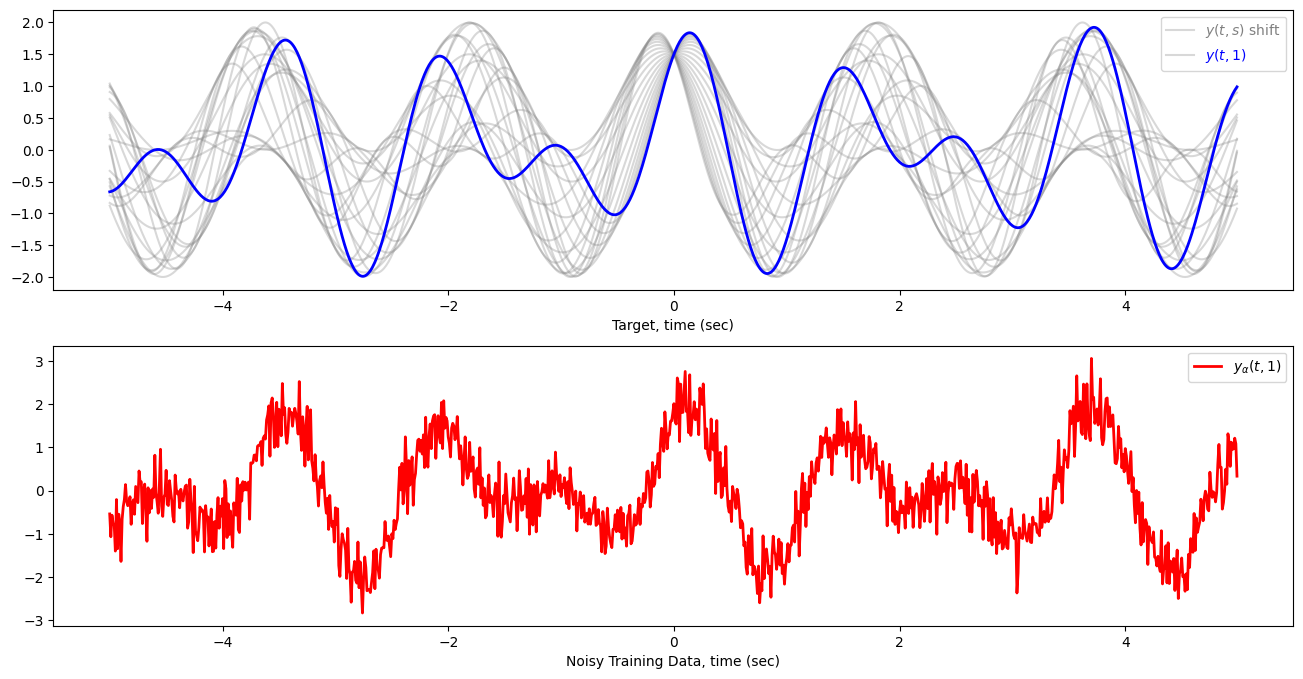

In [ ]:
## SOLUTION REQUIRED IN THIS BLOCK ##

## Plotting simulated functional data

t_line = np.arange(-5., 5., 1/100.) # line space
alpha = 0.4
## Creating a function to produce cyclical y data.
def y_func(s):
    t_line = np.arange(-5., 5., 1/100.)
    return np.sin(np.sin(s) * 2 * np.pi * t_line + np.pi/6) + np.cos(2 * np.sqrt(3) * t_line)
y = y_func(1)
## Adding noise
noise = np.random.normal(0, 1, t_line.shape) * alpha
y_noisy = y + noise


## Plotting
fig, ax = plt.subplots(2,1, figsize=(16,8))
fval = np.arange(-1,1,0.1)

for i in fval:
    ax[0].plot(t_line, y_func(i), color='gray', alpha=.3,label="$sin(f)$ shift")

ax[0].plot(t_line, y, lw = 2,label = "fixed $f$",color="b")
ax[0].set_xlabel('Target, time (sec)')
ax[1].plot(t_line, y_noisy, lw = 2,c="r")
ax[1].set_xlabel('Noisy Training Data, time (sec)')
ax[0].legend(["$y(t,s)$ shift","$y(t,1)$"],labelcolor=["gray","b"])
ax[1].legend(["$y_{\\alpha}(t,1)$"])


In the figure above we can see the true output of the generating function, given a specific value of $s$ (blue), and various drifts according to different values of $s$ (gray).  In the bottom plot you can see the noisy data (training),  matching the blue graph in the top plot.

### Creating PyTorch RNN model

Here we create a basic PyTorch RNN class (inherits from `nn.Module`).  

* *input_size* – The number of expected features (dimensions) in the input t

* *hidden_size* – The number of features in the hidden state h

* *num_layers* – Number of recurrent layers. E.g., setting num_layers=2 would mean stacking two RNNs together to form a stacked RNN, with the second RNN taking in outputs of the first RNN and computing the final results.    

* batch_first – If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature). Note that this does not apply to hidden or cell states.




For more information, please check the
[PyTorch nn.RNN](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html#torch.nn.RNN) documentation.


In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()

        self.hidden_dim=hidden_dim

        # define an RNN with specified parameters
        # batch_first means that the first dim of the input and output will be the batch_size
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)

        # Adding a fully-connected layer
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        # x (batch_size, seq_length, input_size)
        # hidden (n_layers, batch_size, hidden_dim)
        # r_out (batch_size, time_step, hidden_size)
        batch_size = x.size(0)

        # get RNN outputs
        r_out, hidden = self.rnn(x, hidden)
        r_out = r_out.view(-1, self.hidden_dim)

        # get final output
        output = self.fc(r_out)

        return output, hidden


In [ ]:

# RNN Hyperparameters
input_size=1 # our data is 1-dim
output_size=1
hidden_dim=16
n_layers=2

# instantiate an RNN model
rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

RNN(
  (rnn): RNN(1, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


### RNN Training

Now we need to define a training function that takes the following hyper-parameters:  

* rnn : the RNN model object
* n_steps = on how many steps ($t$) to train the model (equivalent to "epochs").
* lag = the steps/datapoints lag between the training and target data.
* alpha = how much noise to add to the training data
* seq_length = how many datapoints  (time-series steps) to consider in each "epoch": $(t-k:t)$
* stride = the window size of the function (of which the seq_length will be divided).
* print_every = how often (in steps) to print a plot of the prediction against the target.

At each step, we have a lagged value of x, noisy lagged value of x (training), and a value of y (target not lagged).

P3Q2:  (5pts)

Fill out the missing code according to the function definition above

In [ ]:
## SOLUTION REQUIRED IN THIS BLOCK##

# As above, creating a simulated data generator from our function (not noisy)
# this time, the function should depend on "step" as well (x_line is ever changing).

# y_func = ## SOLUTION NEEDED
def y_func(s, t_line):
    return np.sin(np.sin(s) * 2 * np.pi * t_line + np.pi/6) + np.cos(2 * np.sqrt(3) * t_line)


In [ ]:
# train the RNN
def train(rnn,y_func, n_steps, print_every,stride,seq_length,
          alpha,lag):
    # initialize the RNN hidden state
    hidden = None
    s = 1 # initialize f
    for batch_i, step in enumerate(range(n_steps)):
        # defining the training data

        # t_line = np.linspace(y_func(s,step),y_func(s,step)+stride,seq_length+stride)
        t_line =  np.linspace(step,step+stride, seq_length)
        data = y_func(s,t_line)
        noisy_data =  data + np.random.randn(len(t_line))*alpha
        # update f
        s += 0.05

        # prepare data for training
        data.resize((seq_length , 1)) # input_size=1
        noisy_data.resize((seq_length , 1)) # input_size=1
        # creating a lag in the noisy data aginst y
        x = noisy_data[:-lag]
        y = data[lag:]

        # convert data into Tensors
        x_tensor = torch.Tensor(x).unsqueeze(0) # unsqueeze gives a 1, batch_size dimension
        y_tensor = torch.Tensor(y)

        # outputs from the rnn
        prediction, hidden = rnn(x_tensor, hidden)

        ## Representing Memory ##
        # make a new variable for hidden and detach the hidden state from its history
        # this way, we don't backpropagate through the entire history
        hidden = hidden.data

        # calculate the loss
        loss = criterion(prediction, y_tensor)
        # zero out gradients
        optimizer.zero_grad()
        # calculate backprop and update weights
        loss.backward()
        optimizer.step()

        # plot loss and predictions
        if batch_i%print_every == 0:
            plt.plot(t_line[lag:], x, 'r.',label = "training")
            plt.plot(t_line[lag:], y, 'b.',label = "actual")
            plt.plot(t_line[lag:], prediction.data.numpy().flatten(), 'y.',label= "prediction") #
            plt.title("Loss: {:,}".format(loss.item()))
            plt.legend(loc="upper left")
            plt.show()

    return rnn

# MSE loss and Adam optimizer with a learning rate of 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

    
Train the RNN model on various hyper-parameters (defined below) and review the results.   


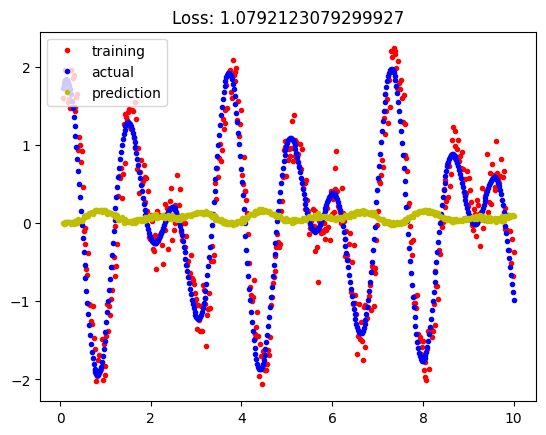

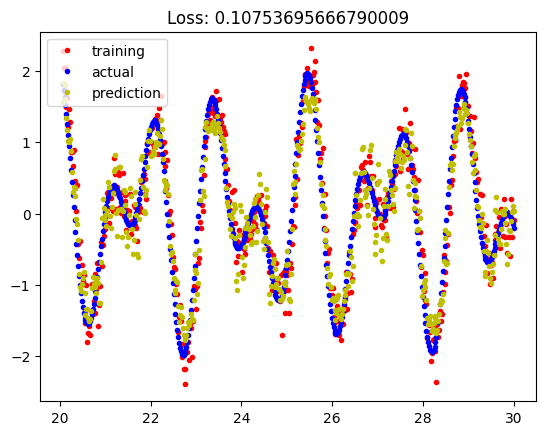

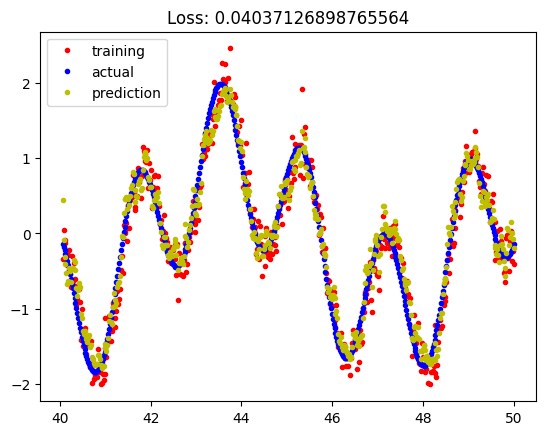

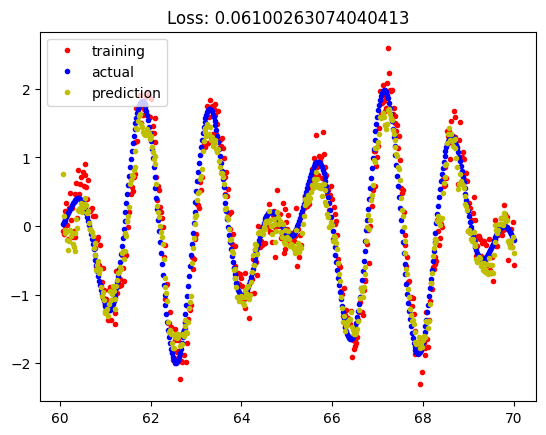

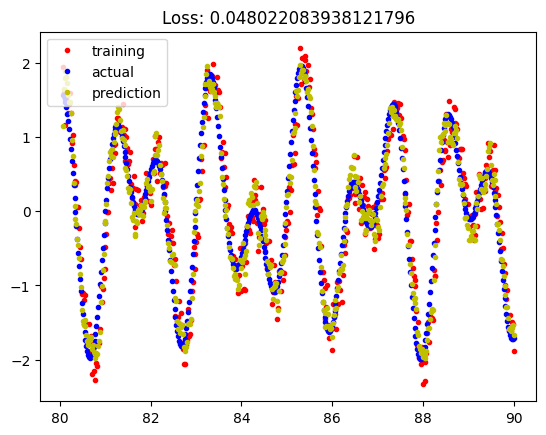

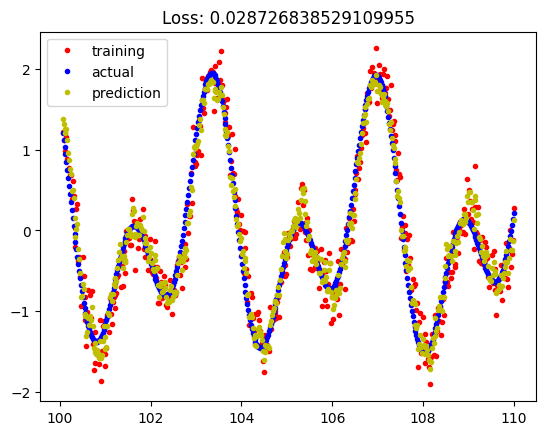

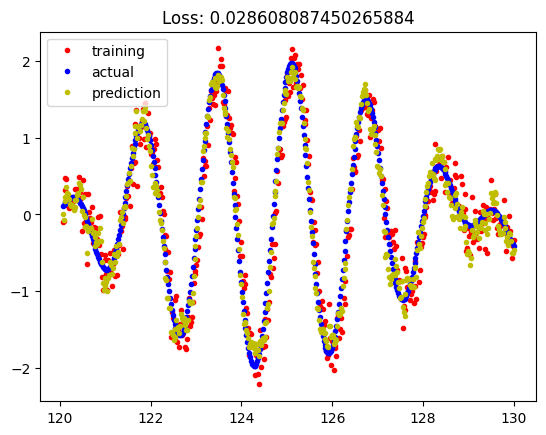

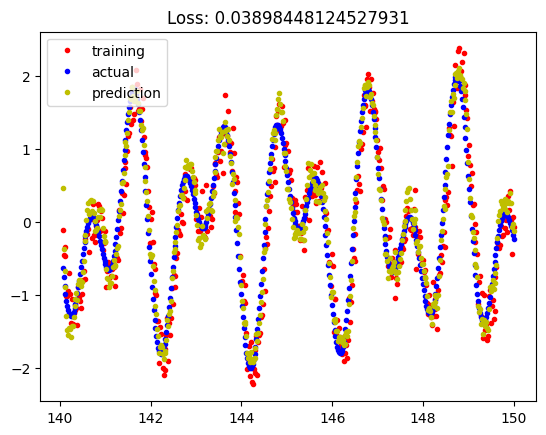

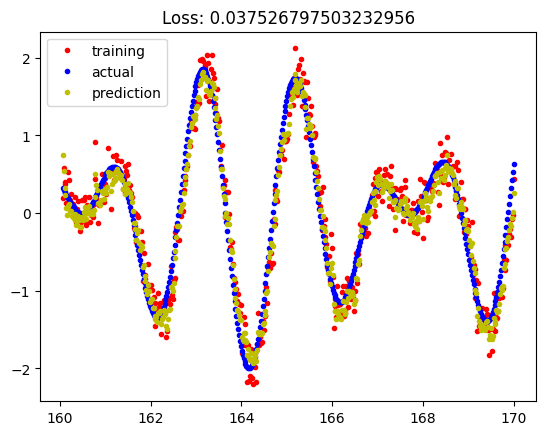

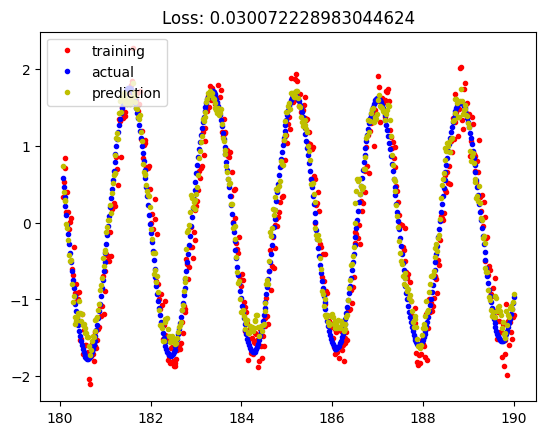

In [ ]:

# train the rnn and monitor results

n_steps = 200
stride = 10
lag = 3
alpha = 0.2
seq_length = 500
print_every = 20

trained_rnn = train(rnn, y_func,  n_steps, print_every,
                    stride,seq_length,alpha,lag)

P3Q3: (10pts)

(a) Do you think our model performs well?     
(b) Write about the relationships and interplay between the different hyper-parameters, and explain how they effect the RNN model. Please relate also to the RNN architecture in our solution.

(c) Can you give a real world example where this type of model can be applied?   
(d) What would you change to improve it?

Write your solution here!

a. The model performs well overall, as evidenced by the loss reduction during the early stages of training. Initially, the model effectively learned and minimized the error, resulting in a steady decrease in loss. However, after a certain point, the loss appears to have plateaued and stabilized, suggesting that the model has reached a local minimum or is experiencing diminishing returns in its learning process. While the loss has stabilized, the low final value indicates that the model is capturing the underlying patterns in the data effectively. Further fine-tuning or adjustments to the hyperparameters might help achieve further improvements if needed.

b. The hyperparameters of the model are:

1. n_steps (epochs): This defines the number of times the model will iterate over the entire training dataset. More steps usually improve model performance, but too many steps might lead to overfitting.In our model n_steps = 200 means the model will have multiple opportunities to adjust its weights and learn from the data.
If the sequence length or stride is too small, the model may require more epochs to learn effectively. If the model is too complex, more epochs might be necessary to converge.

2. lag: This controls how much past information the model uses to predict the future. A small lag (few steps back) might cause the model to miss important long-term dependencies, while a larger lag could lead to more complex relationships but might also introduce noise or make the model more difficult to train.
A lag of 3 means the model will use data from the 3 previous time steps to make a prediction. If the lag is too small, the model may fail to capture important long-term dependencies in the data. A larger lag increases the complexity of the task but allows the model to use more information from the past.

3. alpha (noise level): Introducing noise to the training data can act as regularization, preventing overfitting and helping the model generalize better to unseen data. However, too much noise can confuse the model and degrade performance.
A value of 0.2 means that 20% of the training data will have noise injected. While noise can improve generalization, too much noise could disrupt learning and lead to poor model performance.
When using higher values for alpha, the model might need longer training times (n_steps) and a larger seq_length to effectively capture and generalize the patterns, as the noise may obscure underlying trends.

4. seq_length: The number of time steps to consider during training. Shorter sequences might not capture long-term dependencies, while longer sequences require more memory and computation. The choice of sequence length affects the model's ability to detect temporal patterns effectively.
A seq_length of 500 means that each training example will consist of 500 time steps.
If the seq_length is too long, the model may struggle to learn effectively if the lag and stride do not align properly, as the model may focus on too many past data points.

5. stride: This determines the size of the moving window when extracting subsequences for training. A smaller stride results in more overlapping subsequences, increasing the number of training examples but potentially making the model more sensitive to noise. Larger strides reduce the number of training examples and could miss important dependencies.
In our model we defined sride to be 10, meaning the subsequences will be selected with a 10-step shift between each training example. Smaller strides lead to more overlap between subsequences, potentially allowing the model to capture finer temporal details.
A large stride combined with a small seq_length may result in underfitting, as the model might not receive enough detailed sequences to learn complex patterns.

c.
This RNN model is well-suited for time-series forecasting, such as predicting stock prices. For instance, given historical stock price data, the model can forecast future values while noise (alpha) ensures robustness against market fluctuations. Similar applications include weather prediction, energy demand forecasting, or traffic flow estimation.

d.
To improve the model:

1. Hyperparameter Tuning: Conduct systematic hyperparameter optimization using techniques like grid search or random search to find the best combination of n_steps, lag, alpha, seq_length, and stride.

2. Model Architecture: We can consider switching to LSTMs, as they are designed to better capture long-range dependencies.

3. Scaling the Data: We want to ensure that the input features are properly scaled, especially for RNNs, to prevent issues with exploding or vanishing gradients.

4. Advanced Optimization Techniques: we can use adaptive optimizers like Adam or RMSprop to enhance convergence and training efficiency.

THE END!